## First plot data points on a scatter plot chart to see if linear regression model can be applied. If yes, then build a model that can answer following questions,

## 1) Predict price of a mercedez benz that is 4 yr old with mileage 45000

## 2) Predict price of a BMW X5 that is 7 yr old with mileage 86000

## 3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("carprices.csv")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [3]:
dum = pd.get_dummies(df['Car Model'], dtype=int)
dum

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [4]:
dum = pd.get_dummies(df['Car Model'], drop_first=True, dtype=int)
dum

,BMW X5,Mercedez Benz C class
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,1


In [5]:
merged = pd.concat([df,dum],axis='columns')
merged

,Car Model,Mileage,Sell Price($),Age(yrs),BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,1,0
1,BMW X5,35000,34000,3,1,0
2,BMW X5,57000,26100,5,1,0
3,BMW X5,22500,40000,2,1,0
4,BMW X5,46000,31500,4,1,0
5,Audi A5,59000,29400,5,0,0
6,Audi A5,52000,32000,5,0,0
7,Audi A5,72000,19300,6,0,0
8,Audi A5,91000,12000,8,0,0
9,Mercedez Benz C class,67000,22000,6,0,1


In [21]:
final = merged.drop(["Car Model"],axis='columns')
final

,Mileage,Sell Price($),Age(yrs),BMW X5,Mercedez Benz C class
0,69000,18000,6,1,0
1,35000,34000,3,1,0
2,57000,26100,5,1,0
3,22500,40000,2,1,0
4,46000,31500,4,1,0
5,59000,29400,5,0,0
6,52000,32000,5,0,0
7,72000,19300,6,0,0
8,91000,12000,8,0,0
9,67000,22000,6,0,1


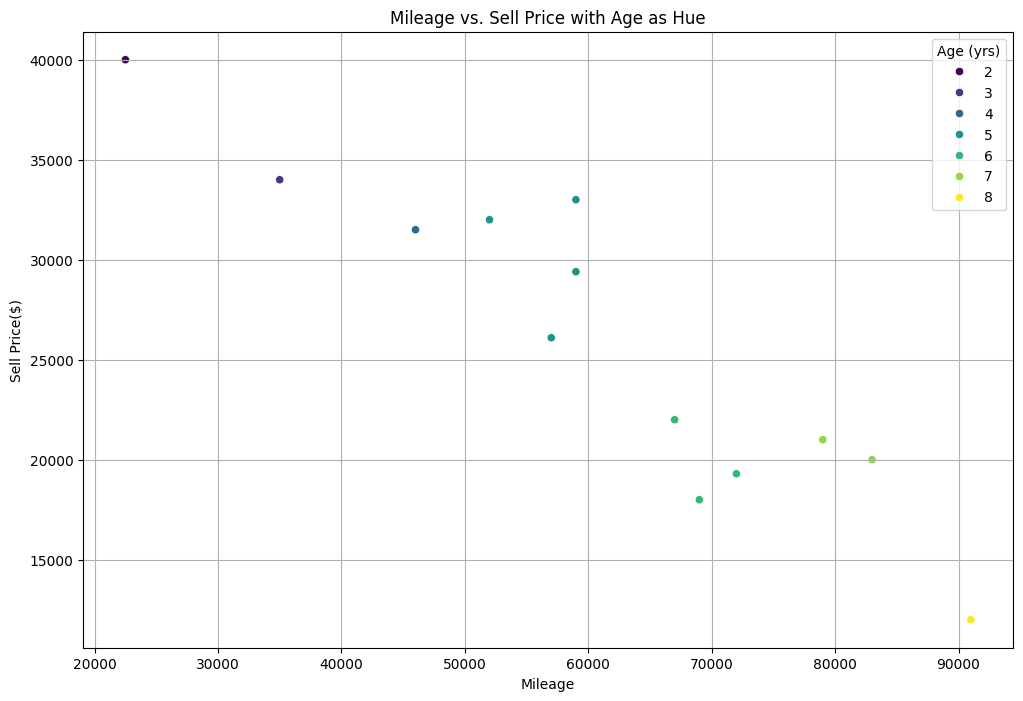

In [31]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=final, x='Mileage', y='Sell Price($)', hue='Age(yrs)', palette='viridis')
plt.xlabel('Mileage')
plt.ylabel('Sell Price($)')
plt.title('Mileage vs. Sell Price with Age as Hue')
plt.legend(title='Age (yrs)')
plt.grid(True)
plt.show()

In [32]:
X = final.drop('Sell Price($)',axis='columns')
X

,Mileage,Age(yrs),BMW X5,Mercedez Benz C class
0,69000,6,1,0
1,35000,3,1,0
2,57000,5,1,0
3,22500,2,1,0
4,46000,4,1,0
5,59000,5,0,0
6,52000,5,0,0
7,72000,6,0,0
8,91000,8,0,0
9,67000,6,0,1


In [38]:
y = final['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [41]:
X_train.shape

(10, 4)

In [42]:
X_train

,Mileage,Age(yrs),BMW X5,Mercedez Benz C class
5,59000,5,0,0
1,35000,3,1,0
9,67000,6,0,1
8,91000,8,0,0
12,59000,5,0,1
6,52000,5,0,0
3,22500,2,1,0
0,69000,6,1,0
4,46000,4,1,0
7,72000,6,0,0


In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
model = LinearRegression()

In [45]:
model.fit(X_train,y_train)

LinearRegression()

In [50]:
model.score(X_train,y_train) * 100

94.63617281806515

**Price of mercedez benz that is 4 yr old with mileage 45000**

In [58]:
predicted_price = model.predict([[35000, 3, 1, 0]])
print(predicted_price)

[35090.63791708]


D:\SOFTWARE\Python installer\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Price of BMW X5 that is 7 yr old with mileage 86000**

In [54]:
model.predict([[86000,7,0,1]])

D:\SOFTWARE\Python installer\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([16405.59935228])